In [ ]:
# install for finance data 
# pip install -U finance_datareader

## 1. 데이터 로드

In [2]:
from datetime import datetime
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df_kospi = fdr.StockListing('KOSPI')
df_kospi.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
df_kospi[df_kospi['Name'] == '삼성전자']['Symbol'].values[0]

'005930'

In [5]:
import FinanceDataReader as fdr
def get_data(name, pos, start, end):
    pos_df = fdr.StockListing(pos)
    code = pos_df[pos_df['Name'] == name]['Symbol'].values[0]

    return fdr.DataReader(code, start, end)


start = datetime(2017,1,2)
end = datetime(2020,3,12)
stock_df = get_data('삼성전자', 'KOSPI', start, end)
stock_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


In [6]:
stock_df.shape

(782, 6)

In [7]:
stock_df.describe()

,Open,High,Low,Close,Volume,Change
count,782.000000,782.000000,782.000000,782.000000,7.820000e+02,782.000000
mean,47132.593350,47595.524297,46660.597187,47335.895141,7.153422e+06,0.000565
std,5943.449348,5985.138133,5837.352624,5144.852993,7.456500e+06,0.015891
min,0.000000,0.000000,0.000000,35560.000000,0.000000e+00,-0.050847
25%,44000.000000,44450.000000,43650.000000,44050.000000,2.396492e+05,-0.008742
50%,46700.000000,47100.000000,46200.000000,46725.000000,7.364052e+06,0.000989
75%,50615.000000,51075.000000,50020.000000,50635.000000,1.150323e+07,0.010340
max,62000.000000,62800.000000,61700.000000,62400.000000,6.349111e+07,0.047450


## 2. 데이터 전처리

### 2.1. 다양한 입력피쳐 설계하기

#### 2.1.1 중간값

In [8]:
stock_df['Mid'] = stock_df.apply(lambda x : (x['High'] + x['Low']) / 2, axis = 1)
stock_df.head()

,Open,High,Low,Close,Volume,Change,Mid
Date,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0
2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0
2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0
2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0
2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0


#### 2.1.2 이동평균

In [9]:
# MA5
stock_df['MA5'] = stock_df['Close'].rolling(window=5).mean()
# MA20
stock_df['MA20'] = stock_df['Close'].rolling(window=20).mean()

stock_df = stock_df.fillna(0)

In [10]:
stock_df.head()

,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20
Date,,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0
2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0
2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0
2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0
2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0


#### 2.1.3 거래량이동평균

In [11]:
#거래량이동평균- VMA5
stock_df['VMA5'] = stock_df['Volume'].rolling(window=5).mean()
stock_df = stock_df.fillna(0)
stock_df.head(10)

,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20,VMA5
Date,,,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0,0.0
2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0,0.0
2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0,0.0
2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0,0.0
2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0,159313.6
2017-01-09,36600,37500,36560,37220,263898,0.028177,37030.0,36324.0,0.0,193490.8
2017-01-10,37280,37400,37080,37240,181996,0.000537,37240.0,36476.0,0.0,200459.4
2017-01-11,37520,38560,37420,38280,240363,0.027927,37990.0,36900.0,0.0,216645.0
2017-01-12,38000,38800,37980,38800,233383,0.013584,38390.0,37548.0,0.0,219451.8


#### 2.1.4 이격도

In [12]:
stock_df['DISP5'] = stock_df.apply(lambda x : x['Close'] / x['MA5'] * 100 if x['MA5'] else 0, axis = 1)
stock_df.head()

,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20,VMA5,DISP5
Date,,,,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0,0.0,0.000000
2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0,0.0,0.000000
2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0,0.0,0.000000
2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0,0.0,0.000000
2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0,159313.6,100.277008


#### 2.1.5 골든크로스 / 데드크로스 

In [13]:
stock_df.reset_index(inplace = True)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20,VMA5,DISP5
0,2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0,0.0,0.000000
1,2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0,0.0,0.000000
2,2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0,0.0,0.000000
3,2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0,0.0,0.000000
4,2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0,159313.6,100.277008


In [14]:
stock_df['GC'] = False
stock_df['DC'] = False
for idx, (m5, m20) in enumerate(zip(stock_df['MA5'], stock_df['MA20'])):
    if idx < 20 or idx == len(stock_df) - 1: continue

    #오늘 5일 단기선이 20일 장기선보다 작거나 같고, 내일 5일선이 상향돌파
    if m5 <= m20 and stock_df.at[idx+1, 'MA5'] > stock_df.at[idx+1, 'MA20'] : stock_df.at[idx, 'GC'] = True
    #오늘 5일 단기선이 20일 장기선보다 크거나 같고, 내일 5일선이 상향돌파
    if m5 >= m20 and stock_df.at[idx+1, 'MA5'] < stock_df.at[idx+1, 'MA20'] : stock_df.at[idx, 'DC'] = True


#### 2.1.6. RSI

In [15]:
#가격의 상승압력과 하락압력 사이의 상대적인 강도를 나타내는 지표
#1에 수렴할수록 주가의 상승추세가 크며, 0에 수렴할수록 주가의 하락추세가 크다는 것을 의미함 
stock_df['diff'] = stock_df['Close'].diff(periods=-1).fillna(0)

stock_df['up'] = stock_df.apply(lambda x : -x['diff'] if x['diff'] < 0 else 0, axis = 1)
stock_df['down'] = stock_df.apply(lambda x : x['diff'] if x['diff'] > 0 else 0, axis = 1)
stock_df['AU'] = stock_df['up'].rolling(window = 15).mean()
stock_df['AD'] = stock_df['down'].rolling(window = 15).mean()
stock_df['RSI'] = stock_df.apply(lambda x : x['AU'] / (x['AU'] + x['AD']), axis = 1)

stock_df.drop(['up', 'down','AU', 'AD'], axis = 1, inplace = True)
stock_df = stock_df.fillna(0)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20,VMA5,DISP5,GC,DC,diff,RSI
0,2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0,0.0,0.000000,False,False,-380.0,0.0
1,2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0,0.0,0.000000,False,False,320.0,0.0
2,2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0,0.0,0.000000,False,False,600.0,0.0
3,2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0,0.0,0.000000,False,False,-640.0,0.0
4,2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0,159313.6,100.277008,False,False,-1020.0,0.0


#### 2.1.7. MACD

In [16]:
# 단기이동평균선과 장기이동평균 사이의 관계를 보여주는 지표로, 국내 주식시장을 고려해 MA5와 MA20의 차를 이용함 
stock_df['MACD'] = stock_df.apply(lambda x : x['MA5'] - x['MA20'], axis = 1)
stock_df['MACDS'] = stock_df['MACD'].rolling(window=9).mean()
stock_df['Oscillator'] = stock_df['MACD'] - stock_df['MACDS']

stock_df = stock_df.fillna(0)
stock_df

,Date,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20,VMA5,DISP5,GC,DC,diff,RSI,MACD,MACDS,Oscillator
0,2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0,0.0,0.000000,False,False,-380.0,0.000000,0.0,0.000000,0.000000
1,2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0,0.0,0.000000,False,False,320.0,0.000000,0.0,0.000000,0.000000
2,2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0,0.0,0.000000,False,False,600.0,0.000000,0.0,0.000000,0.000000
3,2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0,0.0,0.000000,False,False,-640.0,0.000000,0.0,0.000000,0.000000
4,2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0,159313.6,100.277008,False,False,-1020.0,0.000000,36100.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2020-03-06,56500,57200,56200,56500,18716656,-0.022491,56700.0,56420.0,58335.0,25183016.2,100.141794,False,False,2300.0,0.291429,-1915.0,-2287.222222,372.222222
778,2020-03-09,54700,55000,53600,54200,30261485,-0.040708,54300.0,56260.0,58060.0,25154630.8,96.338429,False,False,-400.0,0.339506,-1800.0,-2423.888889,623.888889
779,2020-03-10,53800,54900,53700,54600,32106554,0.007380,54300.0,56100.0,57795.0,25509882.6,97.326203,False,False,2500.0,0.278689,-1695.0,-2481.111111,786.111111
780,2020-03-11,54300,54400,52000,52100,45707281,-0.045788,53200.0,55040.0,57375.0,29698193.2,94.658430,False,False,1300.0,0.262887,-2335.0,-2525.555556,190.555556


In [17]:
stock_df.set_index('Date', inplace = True)
stock_df.head()

,Open,High,Low,Close,Volume,Change,Mid,MA5,MA20,VMA5,DISP5,GC,DC,diff,RSI,MACD,MACDS,Oscillator
Date,,,,,,,,,,,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,36060.0,0.0,0.0,0.0,0.000000,False,False,-380.0,0.0,0.0,0.0,0.0
2017-01-03,36280,36620,36020,36480,147153,0.010526,36320.0,0.0,0.0,0.0,0.000000,False,False,320.0,0.0,0.0,0.0,0.0
2017-01-04,36500,36520,36100,36160,159435,-0.008772,36310.0,0.0,0.0,0.0,0.000000,False,False,600.0,0.0,0.0,0.0,0.0
2017-01-05,36060,36060,35540,35560,219349,-0.016593,35800.0,0.0,0.0,0.0,0.000000,False,False,-640.0,0.0,0.0,0.0,0.0
2017-01-06,36180,36440,36040,36200,177619,0.017998,36240.0,36100.0,0.0,159313.6,100.277008,False,False,-1020.0,0.0,36100.0,0.0,0.0


### 2.2. 시각화를 통해 탐색적 데이터 분석 진행하기

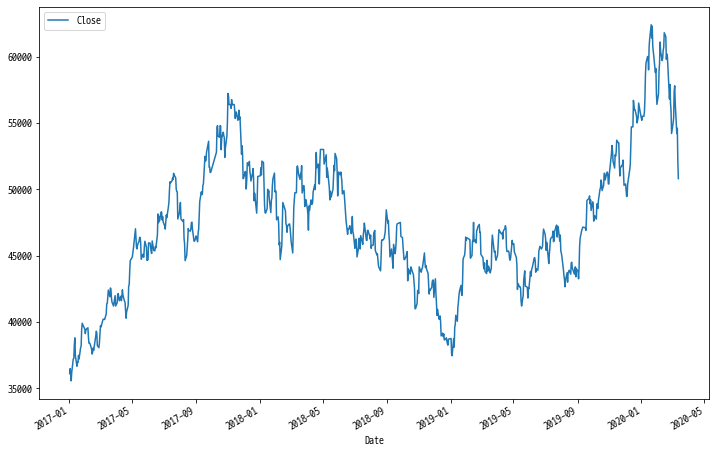

In [18]:
plt.figure(figsize=(12,8))
stock_df['Close'].plot()
plt.legend(loc='best')

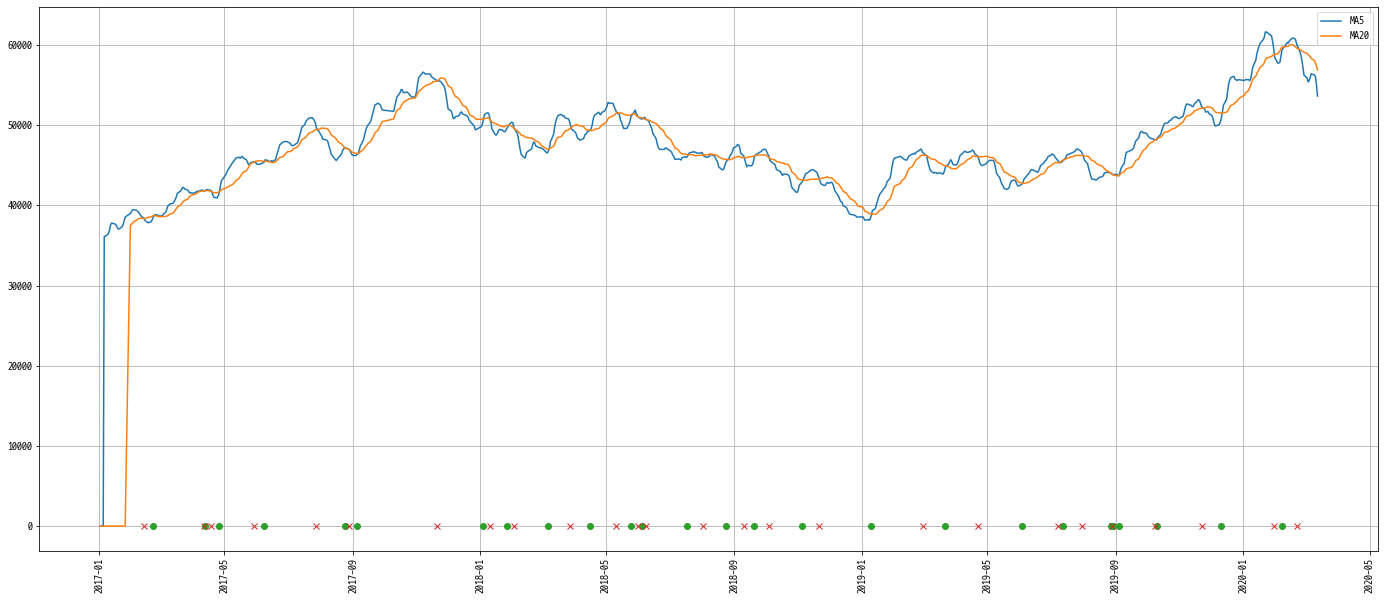

In [19]:
plt.figure(figsize=(24,10))
#plt.plot(stock_df.index, stock_df['Adj Close'], label='Adj Close')
plt.plot(stock_df.index, stock_df['MA5'], label='MA5')
plt.plot(stock_df.index, stock_df['MA20'], label='MA20')
plt.plot(stock_df['GC'].iloc[stock_df['GC'].values == True],'o')
plt.plot(stock_df['DC'].iloc[stock_df['DC'].values == True],'x')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

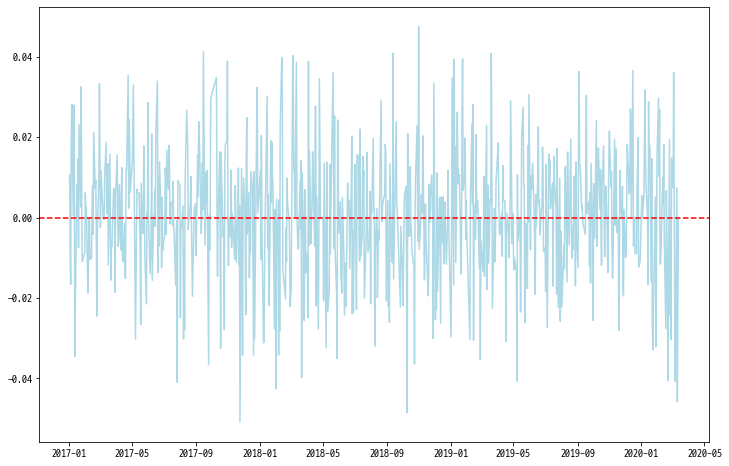

In [21]:
plt.figure(figsize=(12,8))
plt.plot(stock_df.index, (-stock_df['diff']/stock_df['Close']), color='lightblue')
plt.axhline(y=0, color='red', ls='--')
plt.show()

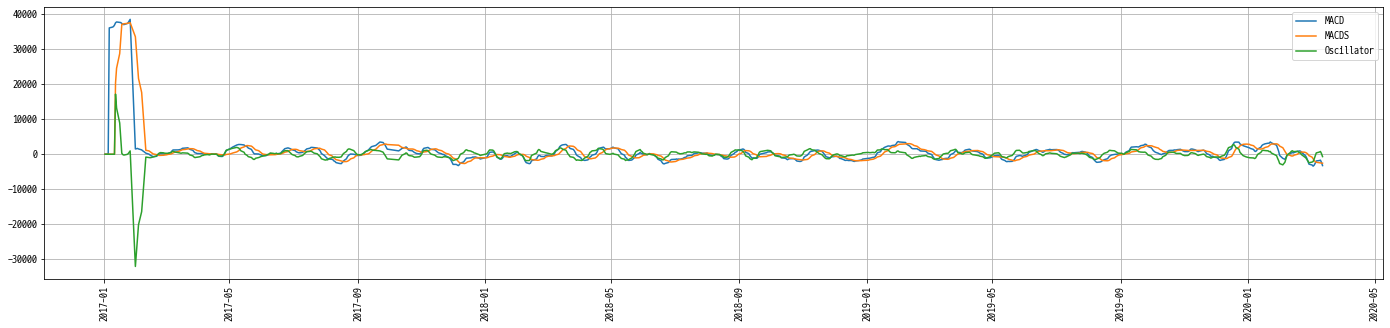

In [22]:
plt.figure(figsize=(24,5))
plt.plot(stock_df.index, stock_df['MACD'], label='MACD')
plt.plot(stock_df.index, stock_df['MACDS'], label='MACDS')
plt.plot(stock_df.index, stock_df['Oscillator'], label='Oscillator')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

### 2.3. 피쳐 스케일링하기

In [23]:
#Min-Max Normalization
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(stock_df)

output = min_max_scaler.transform(stock_df)
output = pd.DataFrame(output, columns=stock_df.columns, index=list(stock_df.index.values))
print(output.head())

                Open      High       Low     Close    Volume    Change  \
2017-01-02  0.580323  0.577070  0.581524  0.020119  0.001465  0.534220   
2017-01-03  0.585161  0.583121  0.583793  0.034277  0.002318  0.624370   
2017-01-04  0.588710  0.581529  0.585089  0.022355  0.002511  0.428045   
2017-01-05  0.581613  0.574204  0.576013  0.000000  0.003455  0.348480   
2017-01-06  0.583548  0.580255  0.584117  0.023845  0.002798  0.700379   

                 Mid       MA5  MA20      VMA5     DISP5   GC   DC      diff  \
2017-01-02  0.579277  0.000000   0.0  0.000000  0.000000  0.0  0.0  0.354839   
2017-01-03  0.583454  0.000000   0.0  0.000000  0.000000  0.0  0.0  0.495968   
2017-01-04  0.583293  0.000000   0.0  0.000000  0.000000  0.0  0.0  0.552419   
2017-01-05  0.575100  0.000000   0.0  0.000000  0.000000  0.0  0.0  0.302419   
2017-01-06  0.582169  0.585659   0.0  0.004553  0.952719  0.0  0.0  0.225806   

            RSI      MACD     MACDS  Oscillator  
2017-01-02  0.0  0.08106

## 3. 데이터 모델링
### 3.1. Train / Validation / Test 데이터셋 구성하기

In [25]:
#Train/Validation/Test 각각 60%, 30%, 10%로 size 설정
train_size = int(len(output)*0.6)
test_size = int(len(output)*0.3) + train_size

#주식종목의 종가 예측을 위해 종가를 label로 설정
train_x = np.array(output[:train_size])
train_y = np.array(output['Close'][:train_size])

test_x = np.array(output[train_size:test_size])
test_y = np.array(output['Close'][train_size:test_size])

validation_x = np.array(output[test_size:])
validation_y = np.array(output['Close'][test_size:])

print(len(train_x)); print(len(test_x)); print(len(validation_x))

469
234
79


### 3.2. Keras를 이용해 딥러닝 수행하기

In [27]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
learning_rate = 0.01 #학습 위한 기초 파라메터 설정
training_cnt = 500 #전체 데이터셋에 대한 반복 학습 횟수 설정
batch_size = 100 #한번에 학습할 데이터의 수 설정
input_size = 17 #기술적 분석 지표를 포함한 17개의 입력피쳐 구성

In [29]:
model = Sequential()
model.add(Dense(input_size, activation='tanh', input_shape=(train_x.shape[1],))) #활성화 함수 Tanh 사용
model.add(Dense(input_size*3, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mape']) #모델 정확도 mse, mae, mape 사용
model.summary
history = model.fit(train_x, train_y, epochs=training_cnt,
                    batch_size=batch_size, verbose=1)
val_mse, val_mae, val_mape = model.evaluate(test_x, test_y, verbose=0)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6130 - mae: 0.7241 - mape: 712314.8750
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0478 - mae: 0.1801 - mape: 385905.7188
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0266 - mae: 0.1295 - mape: 592367.5000
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0257 - mae: 0.1264 - mape: 630521.0625
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0254 - mae: 0.1260 - mape: 635712.6250
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0252 - mae: 0.1253 - mape: 626201.4375
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0250 - mae: 0.1248 - mape: 619429.2500
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1244 - mape: 607600.8750
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1240 - mape: 6158

## 4. 결과 및 결론

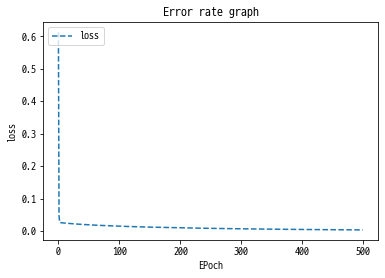

In [30]:
plt.title('Error rate graph')
plt.plot(history.history['loss'], linestyle='--')
plt.legend(['loss'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('EPoch')
plt.show()

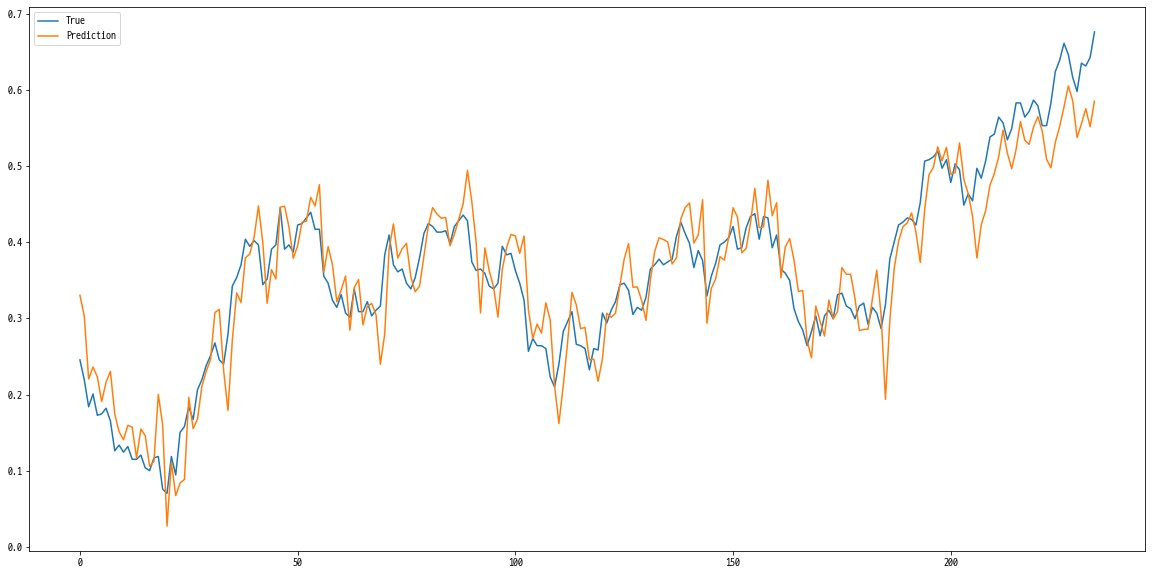

In [31]:
pred = model.predict(test_x)
fig = plt.figure(facecolor='white', figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(test_y, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

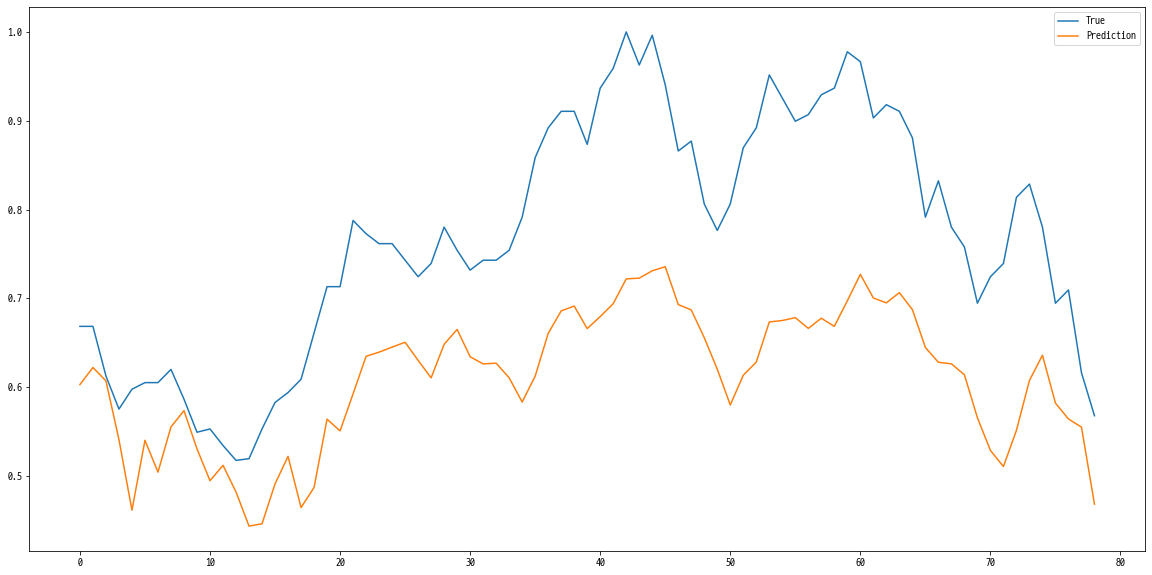

In [32]:
pred = model.predict(validation_x)
fig = plt.figure(facecolor='white', figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(validation_y, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()